In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
path = 'train/kidney_1_dense/labels/1222.tif'

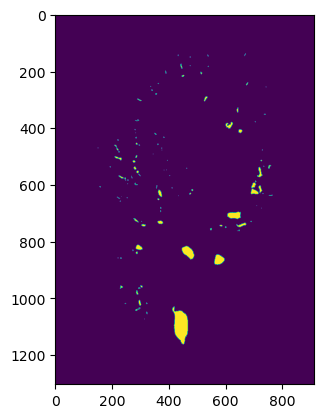

In [5]:
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow('image', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(gray)

In [6]:
num_labels, labels, stats, centroids =  cv2.connectedComponentsWithStats(gray, connectivity=8)

In [7]:
labels.shape

(1303, 912)

In [8]:
x = 500
y = 500
w = 100
h = 100

In [9]:
output = gray.copy()
output = cv2.rectangle(output, (x, y), (x + w, y + h), (100, 25, 255), 10)

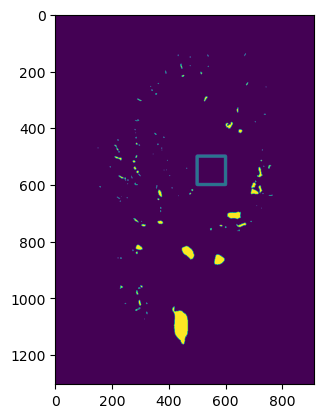

In [10]:
plt.imshow(output)



In [36]:
# loop over the number of unique connected component labels
i = 100
for i in range(i, i+1):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
			i + 1, num_labels)
	# otherwise, we are examining an actual connected component
    else:
    	text = "examining component {}/{}".format( i + 1, num_labels)
	# print a status message update for the current connected
	# component
	#print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    #x   = 1
    output = gray.copy()
    output = cv2.rectangle(output, (x, y), (x + w, y + h), (255, 25, 255), 30)
    output  = cv2.circle(output, (int(cX), int(cY)), 3, (100, 255, 0), 30)
    componentMask = (labels == i).astype("uint8") * 255
	# show our output image and connected component mask
    #cv2.imshow("Output", output)
    #$cv2.imshow("Connected Component", componentMask)
    #cv2.waitKey(0)
    


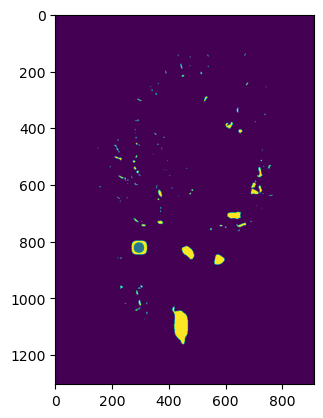

In [37]:
plt.imshow(output)

In [39]:
area

294

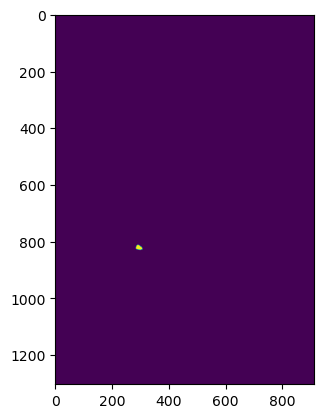

In [38]:
plt.imshow(componentMask)

In [13]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)